# **Project Name**    -  Amazon Prime TV Shows and Movies



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### Name - Vaishnavi S Hakki



# Project Summary


The project focuses on exploring and analyzing the content library of Amazon Prime Video using two datasets — one containing titles information and the other containing cast and crew details. The goal is to clean, structure, and prepare the data for meaningful analysis to uncover trends in content distribution, genres, ratings, and regional patterns.

The datasets contain a mix of categorical and numerical variables, including attributes like genres, age certifications, release years, IMDb/TMDB ratings, production countries, and actor/director information. Before starting the analysis, extensive data preprocessing steps were carried out, such as:

* Handling missing values and duplicates to ensure data accuracy

* Cleaning and standardizing string formats (e.g., genres, production_countries)

* Exploding list-like columns to enable proper grouping and aggregation

* Creating new derived columns.

* Ensuring proper data types for numeric and categorical variable




After these steps, the dataset was well-structured, consistent, and analysis-ready, enabling reliable visualizations and insights in the subsequent stages of the project.

# **Problem Statement**


Amazon Prime TV Shows and Movies - Exploratory Data Analysis

Dataset Description:

Dataset was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

#### **Define Your Business Objective?**

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?

Regional Availability: How does content distribution vary across different regions?

Trends Over Time: How has Amazon Prime’s content library evolved?

IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [172]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [173]:
# Load Dataset
df_titles=pd.read_csv("/content/titles.csv")     # path to csv file
df_credits=pd.read_csv("/content/credits.csv")

### Dataset First View

In [174]:
# Dataset titles first look
df_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [175]:
# dataset credits first look
df_credits

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


### Dataset Rows & Columns count

In [176]:
# Dataset Rows & Columns count
print(df_titles.shape)
print(df_credits.shape)

(9871, 15)
(124235, 5)


### Dataset Information

In [177]:
# Dataset Information
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [178]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [179]:
# Dataset Duplicate Value Count
df_titles.duplicated().sum()

np.int64(3)

In [180]:
df_credits.duplicated().sum()

np.int64(56)

In [181]:
# Boolean mask of duplicates
df_titles.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9866,False
9867,False
9868,False
9869,False


In [182]:
# Boolean mask of duplicates
df_credits.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
124230,False
124231,False
124232,False
124233,False


#### Missing Values/Null Values

In [183]:
# Missing Values/Null Values Count
df_titles.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


In [184]:
df_credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


### What did you know about your dataset?

There are two datasets named titles.csv and credits.csv. Both datasets share a common column name id. The titles.csv dataset consist of 9871 rows and 15 columns. The credits.csv dataset consist of 124235 rows and 5 columns. Both datsets consists of duplicate values and null/missing values which can be handled using data cleaning techniques.

## ***2. Understanding Your Variables***

In [185]:
# Dataset Columns
df_credits.columns


Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [186]:
df_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [187]:
# Dataset Description
df_titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [188]:
df_credits.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### Variables Description

credits.csv consist of person_id, id, name, character, role as columns.
1. person_id gives the unique identification of actor and
2. id gives the unique identification of title.
3. name has the values of different persons name.
4. character has the values of characters in shows.
5. roles contain values of which role played by person like actor or director etc.


titles.csv consists of id, title, type, description, release_year,
       age_certification, runtime, genres, production_countries,
       seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity,
       tmdb_score as columns.
1. id gives the unique identification of title.
2. title gives the name of show title
3. type gives what kind of media it is movie,show etc
4. description gives the description of title
5. release_year gives the year in which the show is released
6. age_certification gives the value of what certification is assigned to the particular title.
7. runtime gives the show runtime
8. genres gives the list of genres on which the titles are made like comedy,drama,action so on.
9. production_countries gives the list of countries produced the shows
10. seasons gives the seasons of the title.
11. imdb_id gives the imdb id of the title.
12. imdb_score gives the imdb rating for the title.
13. imdb_votes gives the voted aquired by the title.
14. tmdb_popularity gives the popularity rating of the title.
15. tmdb_score gives the tmdb_rating for the title.

### Check Unique Values for each variable.

In [189]:
# Checking Unique Values for each variable.
for col in df_credits:
  print(f"{col} : {df_credits[col].unique()}")

person_id : [  59401   31460   31461 ... 1938565  728899 1938620]
id : ['ts20945' 'tm19248' 'tm82253' ... 'tm1079144' 'tm847725' 'tm1054116']
name : ['Joe Besser' 'Moe Howard' 'Larry Fine' ... 'Vijay Thakur' 'Vanya Wellens'
 'Vishwa Bhanu']
character : ['Joe' 'Moe' 'Larry' ... 'Sanjay Thakur' 'Budhiya' 'Gissu']
role : ['ACTOR' 'DIRECTOR']


In [190]:
# Checking Unique Values for each variable.
for col in df_titles:
  print(f"{col} : {df_titles[col].unique()}")

id : ['ts20945' 'tm19248' 'tm82253' ... 'tm847725' 'tm1054116' 'ts275838']
title : ['The Three Stooges' 'The General' 'The Best Years of Our Lives' ...
 'Chasing' 'Baikunth' 'Waking Up Eighty']
type : ['SHOW' 'MOVIE']
description : ["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America’s Civil War, Union spies steal engineer Johnnie Gray's beloved locomotive, 'The General'—with Johnnie's lady love aboard an attached boxcar—and he single-handedly must do all in his power to both get The General back a

## 3. ***Data Wrangling***

### Data Wrangling Code

In [191]:
# Lets make above datasets analysis ready.
# fetching first 5 records of dataset
df_credits.head()


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [192]:
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [193]:
# fetching last 5 records of dataset
df_credits.tail()

,person_id,id,name,character,role
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


In [194]:
df_titles.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN


In [195]:
# fetching datatypes of each column
df_credits.dtypes

,0
person_id,int64
id,object
name,object
character,object
role,object


In [196]:
df_titles.dtypes

,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


In [197]:
# fetch numerical columns(int64,float64)
num_data_titles = df_titles.select_dtypes(include=['int64','float64'])
num_data_titles.columns

Index(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [198]:
# fetch categorical columns(object)
obj_data_titles = df_titles.select_dtypes(include='object')
obj_data_titles.columns

Index(['id', 'title', 'type', 'description', 'age_certification', 'genres',
       'production_countries', 'imdb_id'],
      dtype='object')

In [199]:
num_data_credits = df_credits.select_dtypes(include=['int64','float64'])
num_data_credits.columns

Index(['person_id'], dtype='object')

In [200]:
# fetch categorical columns(object)
obj_data_credits=df_credits.select_dtypes(include='object')
obj_data_credits.columns

Index(['id', 'name', 'character', 'role'], dtype='object')

In [201]:
# Removing inconsistent and unnecessary data from production countries
# Converting 'production_countries' column to string, remove unwanted characters like [ ] and quotes,
# strip extra spaces, and replace empty or invalid values ('nan', 'None', '') with NaN
df_titles['production_countries'] = df_titles['production_countries'].astype(str).str.replace(r"[\[\]']", '', regex=True).str.strip().replace(['nan', 'None', ''], pd.NA)
# Split multiple countries in each row into a list (using comma and space as separator)
df_titles['production_countries'] = df_titles['production_countries'].str.split(', ')
# Expand each list of countries into separate rows and reset the index to maintain a clean DataFrame
df_titles = df_titles.explode('production_countries').reset_index(drop=True)

In [202]:
# Removing inconsistent and unnecessary data from genres
# Converting 'genres' column to string, remove unwanted characters like [ ] and quotes,
# strip extra spaces, and replace empty or invalid values ('nan', 'None', '') with NaN
df_titles['genres'] = df_titles['genres'].astype(str).str.replace(r"[\[\]']", '', regex=True).str.strip().replace(['nan', 'None', ''], pd.NA)
# Split multiple genres in each row into a list (using comma and space as separator)
df_titles['genres'] = df_titles['genres'].str.split(', ')
# Expand each list of genres into separate rows and reset the index to maintain a clean DataFrame
df_titles= df_titles.explode('genres').reset_index(drop=True)

In [203]:
# Removing null values/missing values
df_credits.dropna(inplace=True)

In [204]:
df_titles.dropna(inplace=True)

In [205]:
# Null values count
df_titles.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [206]:
df_credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0


In [207]:
# Removing duplicates
df_credits.drop_duplicates(inplace=True)

In [208]:
df_titles.drop_duplicates(inplace=True)

In [209]:
# Duplicates count
df_titles.duplicated().sum()

np.int64(0)

In [210]:
df_credits.duplicated().sum()

np.int64(0)

In [211]:
# display data
df_credits

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124221,2084915,tm1079144,Jay Nog,Self,ACTOR
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR


In [212]:
df_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24691,ts218566,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,drama,ES,1.0,tt10681240,7.0,689.0,1.400,7.5
24692,ts218566,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,history,ES,1.0,tt10681240,7.0,689.0,1.400,7.5
24693,ts218566,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,romance,ES,1.0,tt10681240,7.0,689.0,1.400,7.5
24909,ts314386,Everybody Loves Natti,SHOW,"An intimate look at the reggaeton superstar, N...",2021,TV-MA,40,documentation,US,1.0,tt15553596,5.8,50.0,2.447,6.0


In [213]:
# Indexing and slicing to fetch specified data
# Using loc - this is label based slicing
# here fetching data from column id till genres in titles dataset
df_titles.loc[:,'id':'genres']

,id,title,type,description,release_year,age_certification,runtime,genres
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy
...,...,...,...,...,...,...,...,...
24691,ts218566,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,drama
24692,ts218566,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,history
24693,ts218566,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,romance
24909,ts314386,Everybody Loves Natti,SHOW,"An intimate look at the reggaeton superstar, N...",2021,TV-MA,40,documentation


In [214]:
# Using iloc - this is index based slicing
# here fetching data from column person_id till character in credits dataset
df_credits.iloc[:,0:4]

,person_id,id,name,character
0,59401,ts20945,Joe Besser,Joe
1,31460,ts20945,Moe Howard,Moe
2,31461,ts20945,Larry Fine,Larry
3,21174,tm19248,Buster Keaton,Johnny Gray
4,28713,tm19248,Marion Mack,Annabelle Lee
...,...,...,...,...
124221,2084915,tm1079144,Jay Nog,Self
124230,1938589,tm1054116,Sangam Shukla,Madhav
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur
124232,728899,tm1054116,Vanya Wellens,Budhiya


In [215]:
# Sorting values based on release_year in ascending order
df_titles.sort_values('release_year',ignore_index=True,inplace=True)

In [216]:
# rename imdb_score as imdb_rating
df_titles.rename({'imdb_score':'imdb_rating'},axis=1,inplace=True)

In [217]:
df_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,26.0,tt0850645,8.6,1092.0,15.424,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,drama,US,1.0,tt16350094,6.9,7846.0,32.397,7.3
1980,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,scifi,US,1.0,tt16350094,6.9,7846.0,32.397,7.3
1981,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,crime,US,1.0,tt9288030,8.1,95704.0,323.037,8.3
1982,ts233948,Power Book IV: Force,SHOW,Follows Tommy Egan after he cuts ties and puts...,2022,TV-MA,54,crime,US,2.0,tt11761194,8.1,4066.0,42.289,9.7


In [218]:
# removing or dropping column named season from title dataset
df_titles.drop('seasons',axis=1,inplace=True)

In [219]:
df_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,tt0850645,8.6,1092.0,15.424,7.6
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,tt0850645,8.6,1092.0,15.424,7.6
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,tt0850645,8.6,1092.0,15.424,7.6
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,tt0850645,8.6,1092.0,15.424,7.6
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,tt0850645,8.6,1092.0,15.424,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,drama,US,tt16350094,6.9,7846.0,32.397,7.3
1980,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,scifi,US,tt16350094,6.9,7846.0,32.397,7.3
1981,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,crime,US,tt9288030,8.1,95704.0,323.037,8.3
1982,ts233948,Power Book IV: Force,SHOW,Follows Tommy Egan after he cuts ties and puts...,2022,TV-MA,54,crime,US,tt11761194,8.1,4066.0,42.289,9.7


In [220]:
# Creating new column named First name
df_credits.loc[:,'First name']=df_credits.loc[:,'name'].str.split(' ').str[0]


In [221]:
# Creating new column named Last name
df_credits.loc[:,'Last name']=df_credits.loc[:,'name'].str.split(' ').str[1]

In [222]:
df_credits

,person_id,id,name,character,role,First name,Last name
0,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser
1,31460,ts20945,Moe Howard,Moe,ACTOR,Moe,Howard
2,31461,ts20945,Larry Fine,Larry,ACTOR,Larry,Fine
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,Buster,Keaton
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,Marion,Mack
...,...,...,...,...,...,...,...
124221,2084915,tm1079144,Jay Nog,Self,ACTOR,Jay,Nog
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,Sangam,Shukla
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,Vijay,Thakur
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,Vanya,Wellens


In [223]:
# find all the shows released after 2020
df_titles.loc[df_titles.loc[:,'release_year']>2020]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
1856,ts302642,Back to the Rafters,SHOW,Back to the Rafters picks up six years since w...,2021,TV-14,45,comedy,AU,tt11401354,7.0,457.0,4.165,8.0
1857,ts303282,Tampa Baes,SHOW,Reality series follows a young group of lesbia...,2021,TV-MA,43,reality,US,tt15076878,4.4,349.0,5.372,1.0
1858,ts255801,Flatbush Misdemeanors,SHOW,Neighborhood best friends and urban millennial...,2021,TV-MA,27,drama,US,tt13266618,6.5,522.0,7.857,5.5
1859,ts117476,Fairfax,SHOW,Animated series centering on four middle schoo...,2021,TV-MA,25,comedy,US,tt6387486,5.0,675.0,9.388,4.8
1860,ts302642,Back to the Rafters,SHOW,Back to the Rafters picks up six years since w...,2021,TV-14,45,drama,AU,tt11401354,7.0,457.0,4.165,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,drama,US,tt16350094,6.9,7846.0,32.397,7.3
1980,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,scifi,US,tt16350094,6.9,7846.0,32.397,7.3
1981,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,crime,US,tt9288030,8.1,95704.0,323.037,8.3
1982,ts233948,Power Book IV: Force,SHOW,Follows Tommy Egan after he cuts ties and puts...,2022,TV-MA,54,crime,US,tt11761194,8.1,4066.0,42.289,9.7


In [224]:
# Multiple condition to fetch data where release_year is greater than 2021 and imdb_rating greater than 8
df_titles.loc[(df_titles.loc[:,'release_year']>2021) & (df_titles.loc[:,'imdb_rating']>8)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
1971,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,action,US,tt9288030,8.1,95704.0,323.037,8.3
1972,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,thriller,US,tt9288030,8.1,95704.0,323.037,8.3
1973,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,drama,US,tt9288030,8.1,95704.0,323.037,8.3
1974,ts230063,The Legend of Vox Machina,SHOW,In a desperate attempt to pay off a mounting b...,2022,TV-MA,24,scifi,US,tt11247158,8.5,18406.0,20.858,8.3
1975,ts230063,The Legend of Vox Machina,SHOW,In a desperate attempt to pay off a mounting b...,2022,TV-MA,24,comedy,US,tt11247158,8.5,18406.0,20.858,8.3
1976,ts230063,The Legend of Vox Machina,SHOW,In a desperate attempt to pay off a mounting b...,2022,TV-MA,24,action,US,tt11247158,8.5,18406.0,20.858,8.3
1977,ts230063,The Legend of Vox Machina,SHOW,In a desperate attempt to pay off a mounting b...,2022,TV-MA,24,animation,US,tt11247158,8.5,18406.0,20.858,8.3
1978,ts230063,The Legend of Vox Machina,SHOW,In a desperate attempt to pay off a mounting b...,2022,TV-MA,24,fantasy,US,tt11247158,8.5,18406.0,20.858,8.3
1981,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,crime,US,tt9288030,8.1,95704.0,323.037,8.3
1982,ts233948,Power Book IV: Force,SHOW,Follows Tommy Egan after he cuts ties and puts...,2022,TV-MA,54,crime,US,tt11761194,8.1,4066.0,42.289,9.7


In [225]:
# Converting float values of imdb_votes to int datatype using apply function
df_titles['imdb_votes']=df_titles['imdb_votes'].apply(lambda x: int(x))
df_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,tt0850645,8.6,1092,15.424,7.6
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,tt0850645,8.6,1092,15.424,7.6
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,tt0850645,8.6,1092,15.424,7.6
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,tt0850645,8.6,1092,15.424,7.6
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,tt0850645,8.6,1092,15.424,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,drama,US,tt16350094,6.9,7846,32.397,7.3
1980,ts319406,The Boys Presents: Diabolical,SHOW,The Boys animated spin-off.,2022,TV-MA,14,scifi,US,tt16350094,6.9,7846,32.397,7.3
1981,ts314375,Reacher,SHOW,Jack Reacher was arrested for murder and now t...,2022,TV-MA,49,crime,US,tt9288030,8.1,95704,323.037,8.3
1982,ts233948,Power Book IV: Force,SHOW,Follows Tommy Egan after he cuts ties and puts...,2022,TV-MA,54,crime,US,tt11761194,8.1,4066,42.289,9.7


In [226]:
# finding max imdb_rating , min imbd_rating , total runtime and mean of imdb_votes using groupby ad agg()
df_titles.groupby('production_countries').agg({'imdb_rating':['max','min'],'imdb_votes':'mean','runtime':'sum'}).reset_index()

production_countries imdb_rating         imdb_votes runtime
                                max  min          mean     sum
0                    AT         7.9  7.9   1195.000000     147
1                    AU         8.9  4.3   5659.844444    1765
2                    BE         8.2  8.2  17859.000000     138
3                    BR         7.1  5.9    231.250000     136
4                    CA         8.6  2.3  17719.839196    5244
5                    CH         7.4  7.4   6678.000000      36
6                    CL         8.4  8.4     20.000000     168
7                    CN         8.8  5.6   2603.000000     548
8                    DE         8.5  5.5   8423.272727    1204
9                    DK         7.2  6.4   3079.727273     203
10                   ES         8.2  6.6   1149.437500     731
11                   FR         8.9  5.6   4603.565217    1036
12                   GB         9.1  2.2  15786.862637   14849
13                   IE         8.1  6.7  76335.250000     196
14                   IN         8.8  6.3  38554.150000     798
15                   IT         8.2  5.8   7898.000000     441
16                   JP         8.8  4.6   3697.812977    6266
17                   KR         8.0  5.1   2428.720000    1012
18                   MX         7.5  4.2   1050.000000     362
19                   NL         5.1  5.1     77.000000      12
20                   NZ         7.4  6.4    706.400000     269
21                   PR         5.9  5.9    264.000000      44
22                   US         9.4  3.1  29097.800000   31791

In [227]:
# merging dataset title and credits into single dataframe named data
# performing inner join to fetch only matching values.
data=pd.merge(df_credits,df_titles,on='id',how='inner')
data

,person_id,id,name,character,role,First name,Last name,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,tt0850645,8.6,1092,15.424,7.6
1,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,tt0850645,8.6,1092,15.424,7.6
2,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,tt0850645,8.6,1092,15.424,7.6
3,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,tt0850645,8.6,1092,15.424,7.6
4,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,tt0850645,8.6,1092,15.424,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,127235,ts218566,Raúl Briones,Santos Huesos,ACTOR,Raúl,Briones,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,romance,ES,tt10681240,7.0,689,1.400,7.5
13353,127235,ts218566,Raúl Briones,Santos Huesos,ACTOR,Raúl,Briones,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,history,ES,tt10681240,7.0,689,1.400,7.5
13354,127235,ts218566,Raúl Briones,Santos Huesos,ACTOR,Raúl,Briones,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,drama,ES,tt10681240,7.0,689,1.400,7.5
13355,2124029,ts314386,Natti Natasha,Self,ACTOR,Natti,Natasha,Everybody Loves Natti,SHOW,"An intimate look at the reggaeton superstar, N...",2021,TV-MA,40,music,US,tt15553596,5.8,50,2.447,6.0


In [228]:
# Removing missing/null values after merge
data.dropna()


,person_id,id,name,character,role,First name,Last name,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_rating,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,animation,US,tt0850645,8.6,1092,15.424,7.6
1,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,action,US,tt0850645,8.6,1092,15.424,7.6
2,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,comedy,US,tt0850645,8.6,1092,15.424,7.6
3,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,family,US,tt0850645,8.6,1092,15.424,7.6
4,59401,ts20945,Joe Besser,Joe,ACTOR,Joe,Besser,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,fantasy,US,tt0850645,8.6,1092,15.424,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,127235,ts218566,Raúl Briones,Santos Huesos,ACTOR,Raúl,Briones,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,romance,ES,tt10681240,7.0,689,1.400,7.5
13353,127235,ts218566,Raúl Briones,Santos Huesos,ACTOR,Raúl,Briones,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,history,ES,tt10681240,7.0,689,1.400,7.5
13354,127235,ts218566,Raúl Briones,Santos Huesos,ACTOR,Raúl,Briones,The Vineyard,SHOW,"Based on the novel by María Dueñas, a romantic...",2021,TV-14,50,drama,ES,tt10681240,7.0,689,1.400,7.5
13355,2124029,ts314386,Natti Natasha,Self,ACTOR,Natti,Natasha,Everybody Loves Natti,SHOW,"An intimate look at the reggaeton superstar, N...",2021,TV-MA,40,music,US,tt15553596,5.8,50,2.447,6.0


### What all manipulations have you done and insights you found?

Several data cleaning and transformation steps were carried out on the titles and credits datasets to ensure accuracy, consistency, and better interpretability of the charts.

1. Indexing and Slicing (loc, iloc)

   *   Selected specific columns and row ranges to focus on    relevant variables for visualization.

   *   Used .loc and .iloc to access subsets efficiently for different types of plots.


2. Removing Missing Values

   Removed rows with null values in key columns such as genres, age_certification, imdb_rating, and release_year to avoid incomplete records in visualizations like boxplots or histograms.

3. Handling Duplicates

   Identified and removed duplicate records using drop_duplicates() to avoid double-counting, especially for actor–title relationships.

4. Dropping, Renaming, Sorting, and Replacing

    *   Dropped unnecessary columns for clarity.

    *   Renamed columns (e.g., imdb_score → imdb_rating) for consistency across plots.

    *   Sorted values using sort_values() to make bar plots ordered and readable.

    *   Replaced unwanted characters (e.g., [ ] ') in genres and production_countries strings before splitting them.

5. Creating New Columns
  
    * First Name and last name

    * Exploded list-like columns (genres, production_countries) into separate rows to enable categorical-to-categorical comparisons.

6. Filtering Data

    Selecting Rows Based on Criteria :  

    *   Filtered records based on type, year, or rating. For
        example:
    release_year > 2022 to analyze modern content trends.

    *   Filtering Using Conditions
        Applied multiple boolean conditions for more targeted analysis.
        



These manipulations ensured that:



*   The dataset was clean, structured, and ready for analysis.
*   Visualizations would be accurate, clear, and representative of meaningful patterns.

*  Irrelevant noise (missing values, duplicates, messy strings) was removed before generating plots.









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Charts
Charts analyzing a single variable — distribution, frequency, counts, etc.

### Chart 1


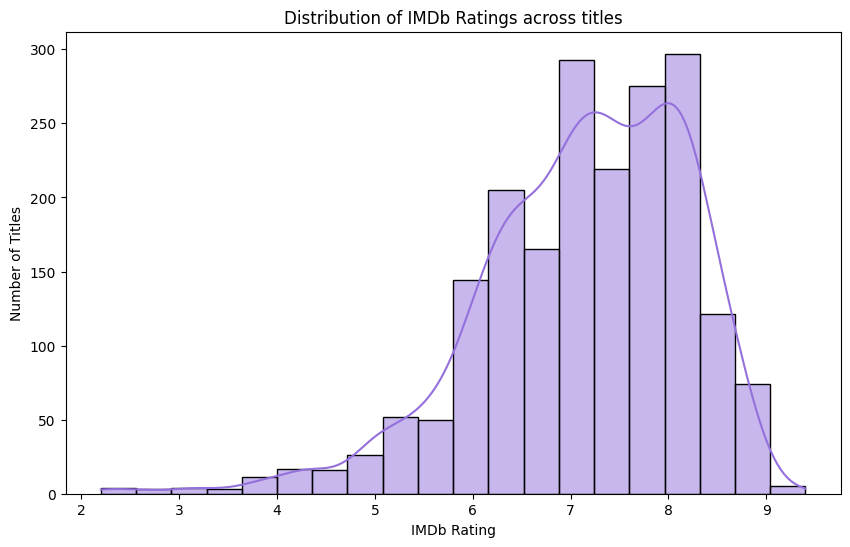

In [229]:
# Chart -1 visualization code
# Histogram - Distribution of IMDB ratings
# libraries are imported in libraries section
# Using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_titles['imdb_rating'], bins=20, kde=True, color='mediumpurple')

# Labels and title
plt.xlabel("IMDb Rating")                       # x-axis
plt.ylabel("Number of Titles")                  # y-axis
plt.title("Distribution of IMDb Ratings across titles")       # title text
plt.show()                                      # display

##### 1. Why did you pick the specific chart?

Histograms are great choice for univariate analysis. Its good to analyze frequency distribution of numeric variable. So to analyze distribution of imdb_rating data, I have choosen this chart.  

##### 2. What is/are the insight(s) found from the chart?

* The IMDb ratings of titles on Amazon Prime Video are not uniformly distributed.

* Most titles cluster in the 6 to 8 rating range, indicating that the majority of the content is moderately to well-rated.

* There are fewer titles with extremely low ratings (<5) or very high ratings (>9), suggesting that exceptional or poorly received content is relatively rare.

* The peak around 7 reflects the platform’s focus on maintaining a baseline of quality content, aligning with general audience preferences.

* The distribution is slightly left-skewed, meaning there are more well-rated titles than poorly rated ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights derived from the IMDb ratings distribution suggest a largely positive business impact.
* The majority of titles on Amazon Prime Video fall within the 6 to 8 rating range, indicating a consistent level of content quality. This can contribute to viewer retention, positive audience perception, and can inform strategic marketing efforts by highlighting well-rated titles to enhance user engagement.
* These insights can guide content acquisition and production strategies, ensuring future investments align with audience preferences.

* However, certain observations may indicate areas of concern. The limited number of titles with very high ratings (>9) points to a potential gap in exceptional content that could otherwise strengthen the platform’s competitive positioning.
* Furthermore, the presence of low-rated content (<5), although minimal, may negatively influence user perception if not monitored and managed appropriately.

#### Chart - 2

In [230]:
# Histogram of release year
# Using plotly.express as px library which has been imported in library section
fig = px.histogram(
    df_titles,
    x='release_year',
    nbins=50,
    title='Histogram of Release Year',
    labels={'release_year': 'Release Year', 'count': 'Number of titles'},
)

# Customize layout
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of titles',
    bargap=0.1,
)

##### 1. Why did you pick the specific chart?

Histogram is good to analyze frequency distribution of numeric variable. So to analyze distribution of release_year data, I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* There is a steady increase in the number of titles in recent decades, showing that Amazon Prime has expanded its library significantly over time.

* Earlier years have fewer titles, while the majority of content is concentrated after the 2000s, indicating a focus on modern and contemporary content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The growth in recent content supports audience engagement with contemporary trends, helping the platform stay competitive.

* These insights can guide content strategy, ensuring a balanced mix of modern and classic titles to cater to diverse audience segments.

* However, limited older content may reduce appeal to niche audiences, which should be considered in future content planning.

#### Chart - 3

In [231]:
# Pie chart for distribution of age certification
# Using plotly.express as px library which has been imported in library section
fig_category_pie = px.pie(
    df_titles, names='age_certification',
    title="Pie Chart: Distribution of Age certification",
    hole=0.2,  # this creates a donut chart
    labels={'age_certification': 'Age_certification'}
)
fig_category_pie.show()      # display

##### 1. Why did you pick the specific chart?

Pie charts are great choice to represent part-to-whole relationship and categorical distribution where categories are not more. Here there are 6 age certifications which makes pie chart good choice to visually represent the data. So I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* The distribution shows that certain certifications (e.g., TV-MA, TV-14) dominate the content library.

* Family-friendly certifications (like TV-G, TV-PG) occupy a smaller proportion, indicating that the majority of titles are targeted towards teen and adult audiences.

* A few certification categories have very low representation, suggesting limited content for specific viewer groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* A strong presence of TV-MA and TV-14 content indicates a focus on mature audiences, which aligns with mainstream viewing trends and can help drive engagement among adult subscribers.

* However, the limited family or children’s content may restrict audience diversity, particularly for households with younger viewers.

* These insights can support content acquisition strategies, helping Amazon Prime balance content offerings to attract a wider subscriber base and enhance retention.

#### Chart - 4

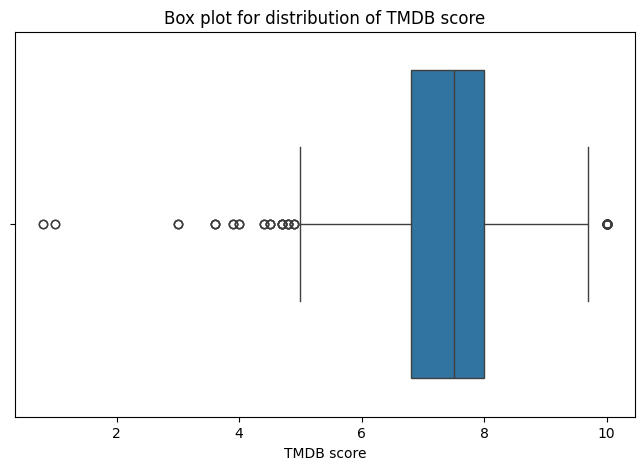

In [232]:
# Box-plot for distribution of TMDB score using matplotlib and seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_titles['tmdb_score'])
plt.title('Box plot for distribution of TMDB score')
plt.xlabel('TMDB score')
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are also great choice for representing distribution of data especially to find outliers. To find tmdb_score distribution and outliers in it, I have choosen Box plot.

##### 2. What is/are the insight(s) found from the chart?

* The TMDB scores are mostly concentrated between 6 and 8, with a median around 7, indicating that most titles have moderate to good popularity.

* A few outliers with very high scores suggest the presence of highly popular titles, while lower outliers are limited.

* The distribution is fairly tight, showing consistent scoring across titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* A strong concentration of scores in the 6–8 range reflects stable audience reception, which supports viewer retention and predictable engagement.

* High-scoring outliers represent potential flagship content that can be leveraged for marketing and promotional campaigns.

* Monitoring low-scoring outliers can help in content optimization, ensuring low-performing titles don’t impact overall platform perception.

#### Chart - 5

In [233]:
# Gauge chart for distribution of each certification using plotly.graph_objects as go
# plotting all charts using plot for better understanding using plotly.subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of certifications
certification_name = ['TV-PG','TV-MA','TV-Y7','TV-14','TV-Y','TV-G']

# Creating subplot
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "indicator"}]*2 for _ in range(3)]   # to indicate what type of chart and its position
)

# Loop through each certification
for idx, name in enumerate(certification_name):
    row = idx // 2 + 1                    # to determine row number
    col = idx % 2 + 1                     # to determine column number

    certify_data = df_titles[df_titles['age_certification'] == name]
    # Calculating mean time of certification
    runtime_rate = certify_data['runtime'].mean().round(2)

    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            number={'suffix':'%'},
            value=runtime_rate,
            gauge={
                "axis": {"range": [0, 100]},
                "bar": {"color": "green"},
                "steps": [
                    {"range": [0, 50], "color": "lightgray"},
                    {"range": [50, 100], "color": "lightblue"}
                ]
            },
            title={"text": f"Average runtime of {name} certification"}
        ),
        row=row, col=col     # assigning row and column values
    )

# Layout
fig.update_layout(
    height=900,
    title={
        "text": "Average Runtime by Age Certification",
        "font": {"size": 28}, # font size
        "x": 0.5,
        "xanchor": "center"
    },
)

fig.show()


##### 1. Why did you pick the specific chart?

* Gauge charts usage here is a good choice because each gauge clearly highlights the average runtime metric per certification, uses a consistent scale for easy comparison, and presents the data in a visually engaging way.
* Also I have used subplots for this case because I can clearly highlight calculations of all certifications at a time which makes visual representation more understandable.

##### 2. What is/are the insight(s) found from the chart?

* There are clear differences in average runtimes across certifications.

* Mature certifications such as TV-MA and TV-14 tend to have higher average runtimes, likely reflecting longer episodes or feature-length content.

* Younger audience certifications (e.g., TV-Y, TV-Y7, TV-G) show lower runtimes, consistent with short-format content aimed at children and families.

* Runtime patterns are well-aligned with content type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding runtime variations by certification helps Amazon Prime optimize user experience, for example by tailoring browsing, recommendation, and scheduling strategies to different audience segments.

* Longer runtimes for mature content may drive longer engagement periods per viewing session, which is valuable for platform retention metrics.

* Identifying certifications with shorter average runtimes can support content planning for younger audiences, ensuring balanced programming across age groups.

#### Chart - 6

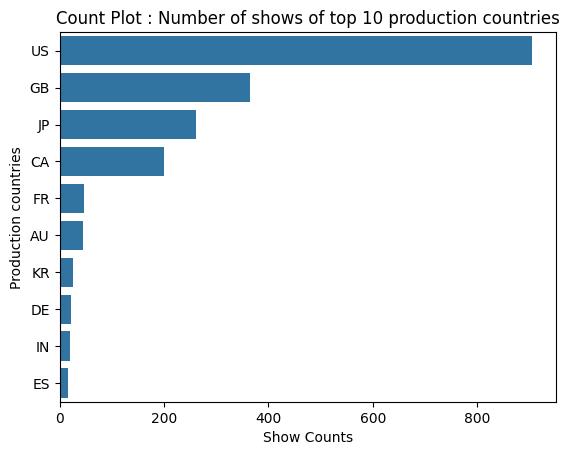

In [234]:
# Count plot for Number of shows of top 10 production countries using matplotlib and seaborn

# Taking count of countries and top 10 values
country_counts = df_titles['production_countries'].value_counts().head(10)

# plt.figure(figsize=(12, 8))
sns.countplot(
    data=df_titles[df_titles['production_countries'].isin(country_counts.index)],
    y='production_countries',
    order=country_counts.index,
)

plt.title('Count Plot : Number of shows of top 10 production countries')
plt.xlabel('Show Counts')
plt.ylabel('Production countries')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is an excellent choice for visualizing categorical distributions, because it clearly shows the frequency of each category, is easy to interpret, and scales well for multiple categories. So to find distribution of titles among top 10 production_countries, I have choosen count plot.

##### 2. What is/are the insight(s) found from the chart?

Insights for Top 10 countries:
* The majority of content originates from a few dominant countries, with the United States leading significantly, followed by countries like the United Kingdom, India, and a few European nations.

* A long-tail distribution is evident — while a handful of countries produce most titles, many others contribute relatively few.

* This pattern reflects regional content concentration and language market dominance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Recognizing top content-producing countries can help Amazon Prime strengthen partnerships and licensing strategies in these regions.

* Expanding investments in high-performing countries can lead to more diverse and popular content, driving higher engagement.

* Underrepresented regions present opportunities for strategic growth, especially in localized content creation to attract new audiences and subscribers.

## Chart - 7


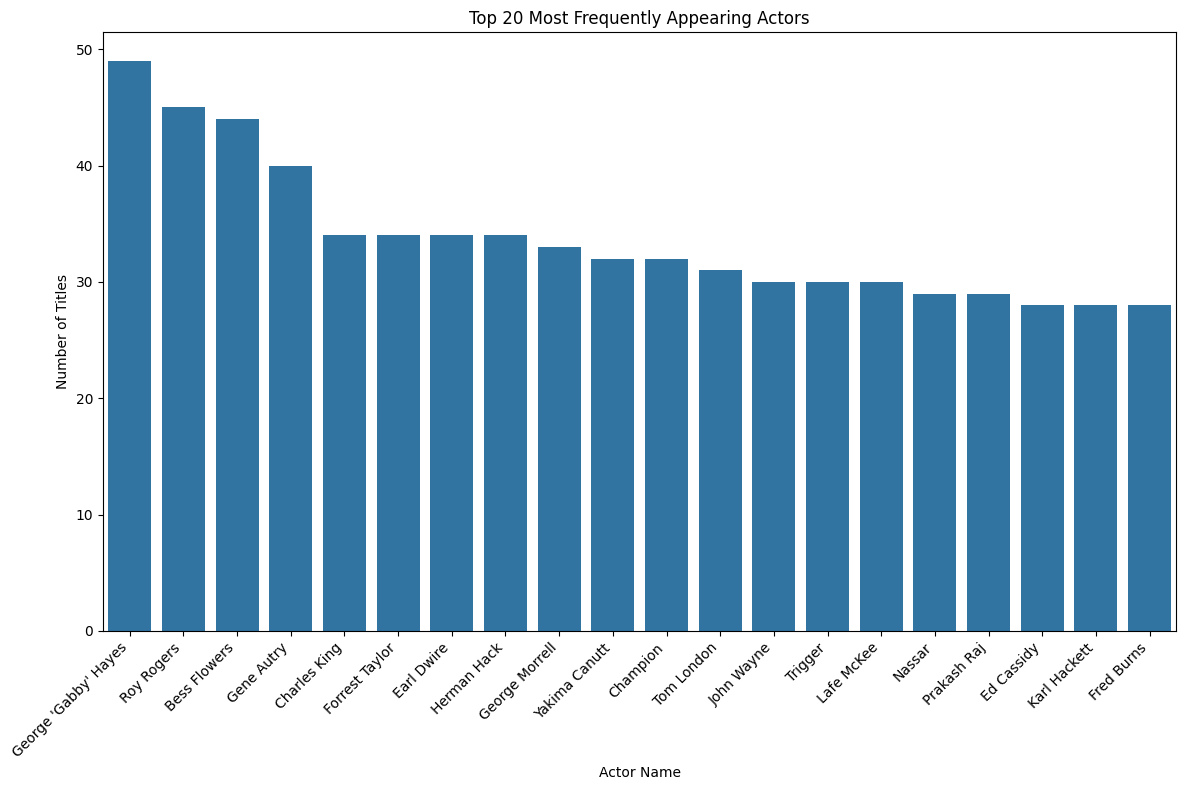

In [235]:
# Bar plot to find Top 20 Most Frequently Appearing Actors using matplotlib and seaborn
# Group by actor and count unique titles they appear in
actor_counts = df_credits.groupby('name')['id'].nunique().sort_values(ascending=False)
# Select top 20 most frequently appearing actors
top_actors = actor_counts.head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(y=top_actors.values, x=top_actors.index)
plt.xlabel("Actor Name")
plt.ylabel("Number of Titles")
plt.title("Top 20 Most Frequently Appearing Actors")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar plot is one of the most versatile and widely used chart types for visualizing categorical data — especially when you want to compare quantitative values across categories. So to compare top 20 frequently appearing actors, I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* A small set of actors appear across multiple titles, indicating their strong presence and popularity on the platform.

* There’s a steep drop after the top few actors, suggesting that a handful of individuals dominate appearances.

* These frequently featured actors likely contribute to content recognition, audience loyalty, and higher viewership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifying top actors helps Amazon Prime leverage star power for marketing, promotions, and future collaborations.

* Investing in projects with these actors can boost engagement and attract new subscribers.

* It also aids in casting strategies, as these popular figures may align with audience preferences and improve content performance.

# Bivariate Charts
Charts exploring the relationship between two variables


## Chart - 8

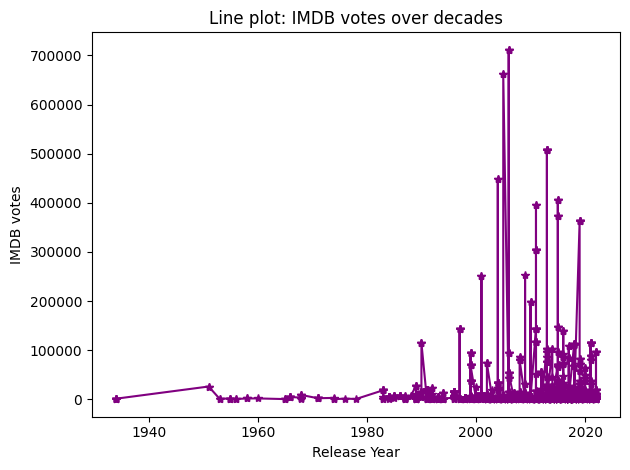

In [236]:
# line chart to analyze IMDB votes over decades using matplotlib
# Numerical to Numerical analysis
plt.plot(df_titles['release_year'],df_titles['imdb_votes'],marker='*',color='purple')
plt.title('Line plot: IMDB votes over decades')
plt.xlabel("Release Year")
plt.ylabel("IMDB votes")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line chart are good for bivariate analysis to reprensent data over time or showing trends over time. So to represent trends of imdb_votes over decades,I have choosen line chart.

##### 2. What is/are the insight(s) found from the chart?

* There is a noticeable increase in IMDb votes for titles released in recent decades, indicating higher audience engagement with newer content.

* Older titles generally received fewer votes, possibly due to lower platform visibility, fewer users at the time of release, or limited digital availability.

* The trend reflects growing user participation and rating culture over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Upward trend suggests that newer releases are more effective in generating audience interaction, which can be leveraged for marketing and recommendation strategies.

* Understanding this voting pattern helps prioritize recent content in promotions, leading to higher engagement and retention.

* It also highlights opportunities to re-promote classic titles to boost their visibility and revive interest.

#### Chart - 9

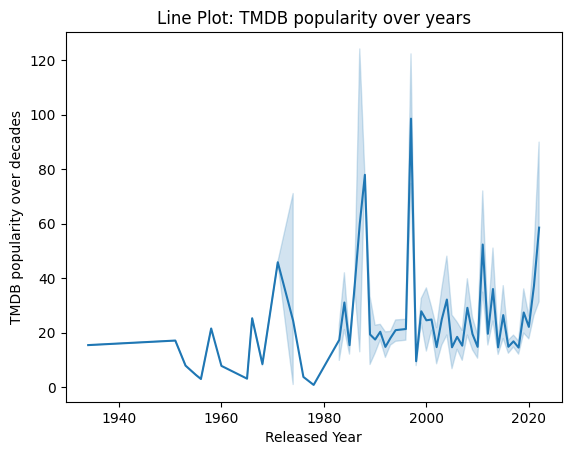

In [237]:
# line chart to analyze TMDB popularity over decades using matplotlib and seaborn
# Numerical to Numerical analysis
sns.lineplot(data=df_titles, x="release_year", y="tmdb_popularity")
plt.title('Line Plot: TMDB popularity over years')
plt.xlabel('Released Year')
plt.ylabel('TMDB popularity over decades')
plt.show()


##### 1. Why did you pick the specific chart?

Line chart are good for bivariate analysis to reprensent data over time or showing trends over time. So to represent trends of tmdb_popularity over decades,I have choosen line chart.

##### 2. What is/are the insight(s) found from the chart?

* The line chart shows a rising trend in TMDB popularity scores for more recent release years, indicating that newer titles tend to gain more traction and online visibility.

* There may be spikes in certain periods, possibly due to the release of popular blockbuster titles or major content expansion on the platform.

* Older titles have comparatively lower popularity scores, which aligns with lower social media presence and fewer user interactions during earlier years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This trend highlights that recent content drives more audience attention and engagement, which can guide strategic investments in contemporary content.

* High popularity scores can inform recommendation algorithms, helping surface trending content to users and increase viewing time.

* Identifying low popularity in older content provides an opportunity to revive or market legacy titles through curated collections, thereby increasing their platform value.

#### Chart - 10

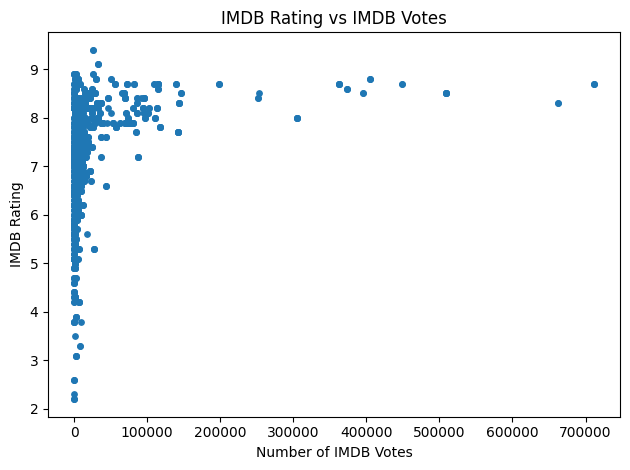

In [238]:
# Scatter plot for IMDb Rating vs Number of Votes using matplotlib
# Numerical to Numerical analysis
plt.scatter(df_titles['imdb_votes'],df_titles['imdb_rating'],s=15)
plt.xlabel("Number of IMDB Votes")
plt.ylabel("IMDB Rating")
plt.title("IMDB Rating vs IMDB Votes")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are best choice to determine the relationship between two variables. So to check relation between imdb_rating and number of votes, I have choosen this chart. This is done using matplotlib only.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plot shows a positive relationship between IMDb votes and ratings, where titles with higher votes generally have moderate to high IMDb ratings.
* A few titles with extremely high vote counts stand out as potential blockbusters or highly popular series.
* There’s also a noticeable cluster of titles with lower vote counts and varied ratings, indicating lesser-known or niche content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifying titles with both high ratings and vote counts can help the platform highlight flagship content for marketing and recommendations.
* Titles with strong ratings but fewer votes represent untapped potential—these could be promoted to wider audiences to boost engagement.
* titles with low ratings but many votes might indicate controversial or polarizing content, useful for audience sentiment analysis.



#### Chart - 11

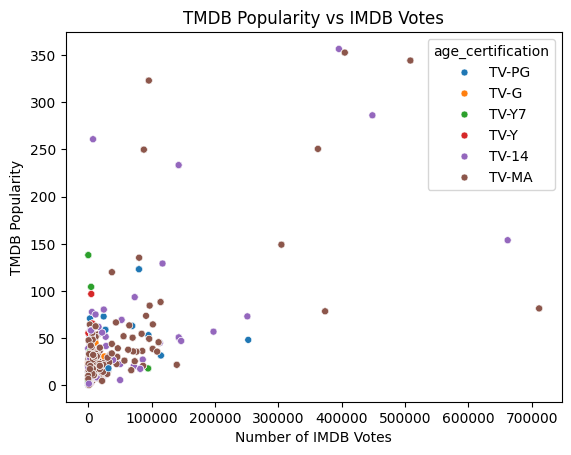

In [239]:
# Scatter plot for TMDb Popularity vs. IMDb Votes by age_certification using matplotlib and seaborn
# Numerical to Numerical analysis
sns.scatterplot(x='imdb_votes', y='tmdb_popularity', hue=df_titles['age_certification'], data=df_titles,s=25)
plt.xlabel("Number of IMDB Votes")
plt.ylabel("TMDB Popularity")
plt.title("TMDB Popularity vs IMDB Votes")
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot using seaborn to check relationship between tmdb_popularity and imdb votes based on age_certification. To achieve this, I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plot indicates a positive correlation between IMDb votes and TMDB popularity — titles with more votes tend to also have higher popularity.
*  Different age certifications cluster differently, with TV-MA and TV-14 titles dominating the higher popularity and vote counts, while TV-Y and TV-G titles mostly stay in the lower range.
* This suggests content for mature audiences receives more attention and engagement overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights can help content strategy and marketing by focusing promotional efforts on popular adult-oriented content, which drives higher engagement.
* Simultaneously, family or kids’ content with lower votes but decent popularity could benefit from targeted campaigns to expand their reach.
* Understanding performance by certification helps balance the content portfolio across audience segments.

#### Chart - 12

In [240]:
# Box plot for Age Certification vs IMDb Rating using plotly.express
# Categorical to numerical analysis
fig = px.box(
    df_titles,
    x='age_certification',
    y='imdb_rating',
    color='age_certification',
    title='Boxplot: Age Certification vs IMDb Rating',
    labels={
        'age_certification': 'Age Certification',
        'imdb_rating': 'IMDb Rating'
    },
    points='outliers'  # show outlier points
)

fig.update_layout(
    xaxis_title='Age Certification',
    yaxis_title='IMDb Rating',
)

fig.show()

##### 1. Why did you pick the specific chart?

Box plots are also great choice for representing distribution of data especially to find outliers. To make it more interactive and visually pleasent and clear, I have used plotly. This helps in understanding Age Certification vs IMDb Rating which also gives outliers in data.



##### 2. What is/are the insight(s) found from the chart?

* The box plot shows that TV-MA and TV-14 certified titles generally have higher median IMDb ratings and a wider spread, indicating both critically acclaimed and varied audience responses.
* TV-Y and TV-G titles tend to have lower median ratings and less variability.
*  A few outliers exist across all categories, representing exceptionally well- or poorly-rated titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding rating distributions across certifications helps in content curation and recommendation strategies.
* High-performing mature content (TV-MA, TV-14) can be leveraged to retain adult viewers, while identifying and promoting strong-performing family titles could expand the younger audience segment.
* Additionally, consistently low ratings in some certifications can guide future content investment decisions.

#### Chart - 13

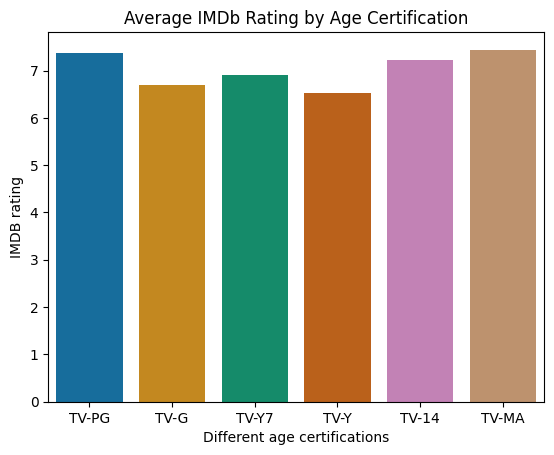

In [241]:
# Bar plot for Average IMDb Rating by Age Certification using matplotlib and seaborn
# Categorical to Numerical analysis
mean_imdb=df_titles.groupby('age_certification')['imdb_rating'].mean().round(2)
df_titles['mean_imdb']=df_titles['age_certification'].map(mean_imdb)
sns.barplot(data=df_titles, x="age_certification", y="mean_imdb", palette="colorblind",hue='age_certification')
plt.xlabel("Different age certifications")
plt.ylabel("IMDB rating")
plt.title("Average IMDb Rating by Age Certification")
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is an excellent choice for categorical distribution, because it clearly shows and compares values across categories, supports many categories also quantitative values, and is easy to interpret accurately. So in order to compare Average IMDb Rating by Age Certification, I have choosen bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Titles with TV-MA and TV-14 certifications have the highest average IMDb ratings.

* TV-Y and TV-G content categories show lower average ratings compared to other certifications.

* Mature content seems to perform better in terms of audience ratings than family or children’s content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Prioritize investment in mature content (TV-MA, TV-14) to maintain and grow engagement.

* Enhance quality of children’s content to broaden audience demographics.

* Use these insights to optimize content recommendations and targeted marketing strategies for different viewer segments.

### Chart - 14

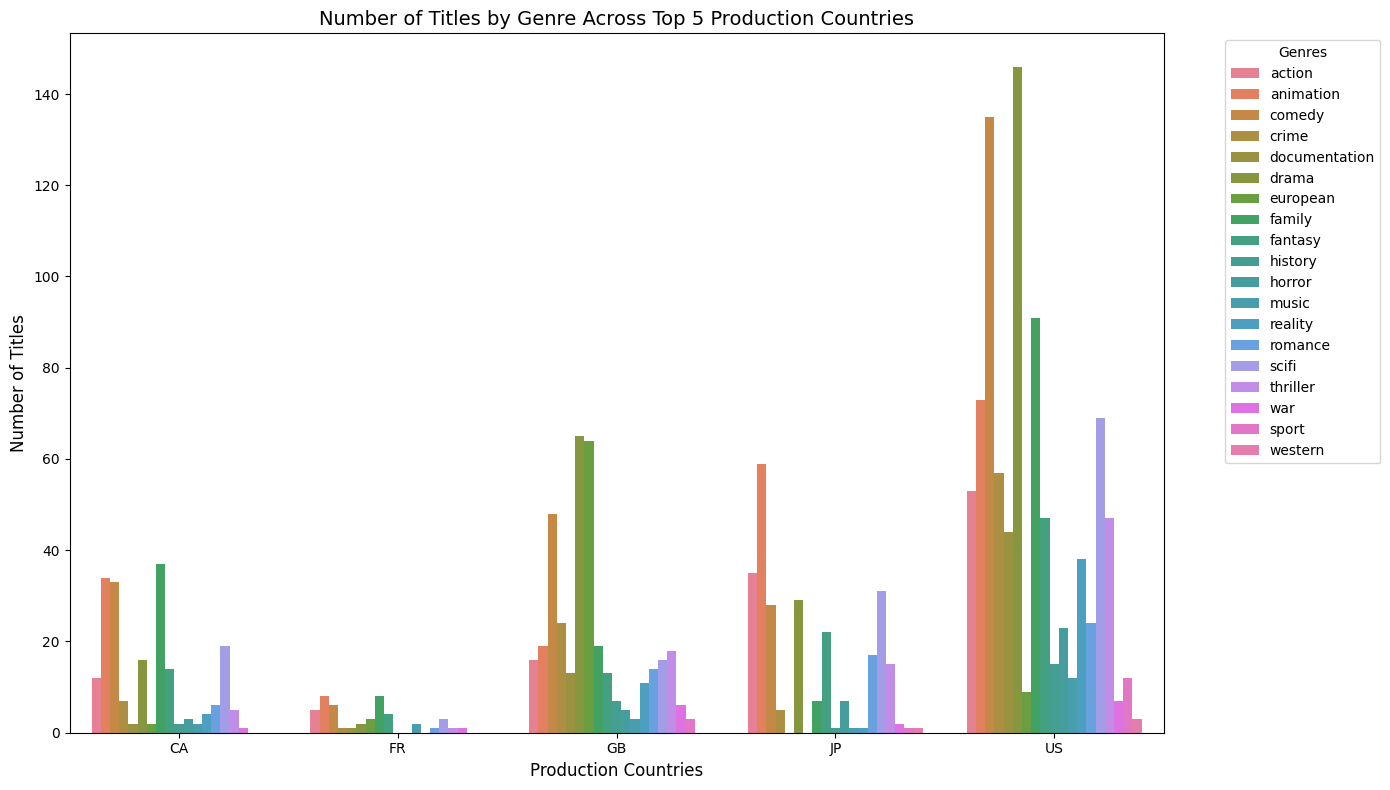

In [242]:
# Grouped Bar plot for Number of Titles by Genre Across Top 5 Production Countries using matplotlib and seaborn
# Categorical to Categorical analysis

counts = df_titles.groupby(['production_countries', 'genres']).size().reset_index(name='count')


# Considering top 5 countries to avoid cluttering
top_countries = counts.groupby('production_countries')['count'].sum().nlargest(5).index
counts = counts[counts['production_countries'].isin(top_countries)]

# plotting grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=counts,
    x='production_countries',
    y='count',
    hue='genres'
)
plt.title('Number of Titles by Genre Across Top 5 Production Countries', fontsize=14)
plt.xlabel('Production Countries', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar plot is an excellent choice for categorical distribution, because it clearly shows and compares values across categories, supports many categories, and is easy to interpret accurately. So in order to compare  Number of Titles by Genre Across Top 5 Production Countries, I have choosen this chart.



##### 2. What is/are the insight(s) found from the chart?

* Certain genres are dominant in specific top production countries, highlighting regional strengths (e.g., US has a broader genre spread).

* Some countries show specialization in fewer genres, indicating focused content production strategies.

* The US consistently leads in the number of titles across almost all genres, followed by other key production countries.

* A few genres appear less represented across multiple countries, suggesting niche or emerging categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Leverage genre strengths by region to tailor content marketing and licensing strategies.

* Identify underrepresented genres in top markets to explore new content opportunities.

* Collaborate with production hubs that dominate specific genres to diversify the platform’s library.

* Use regional genre insights to optimize recommendations for localized audiences.

### Chart - 15

In [243]:
# Subplots demonstrating bivariate analysis using plotly.graph_objects module
# Creating subplots using plotly.subplots module
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creating subplot layout with 2 rows and 2 columns
# Adding custom titles for each subplot
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Box plot : Genres vs IMDB rating",  # Top-left: Box plot
                    "Line Plot: TMDB_popularity over years",  # Top-right: Line Plot
                    "Bar Chart: IMDB votes by Age certification",  # Bottom-left: Bar Chart
                    "Scatter Plot: IMDB rating vs number of votes")  # Bottom-right: Scatter Plot
)

# Box plot to the first subplot (row 1, col 1)
df_genre = df_titles.copy()
# Converting values into str, remove brackets and quotes and split into list
df_genre['genres'] = (df_genre['genres'].astype(str).str.replace(r"[\[\]']", '', regex=True).str.split(', '))

# Exploding genres so each row has a single genre
df_genre = df_genre.explode('genres')

# Drop rows with missing ratings or genres
df_genre = df_genre.dropna(subset=['imdb_rating', 'genres'])
fig.add_trace(
    go.Box(x=df_genre['genres'],y=df_genre['imdb_rating'], name="Genres vs imdb_rating"),
    row=1, col=1  # Specify the location in the subplot grid
)
# Set x-axis and y-axis labels
fig.update_xaxes(title_text="Genre", row=1, col=1)
fig.update_yaxes(title_text="IMDB_Rating", row=1, col=1)

# Add a Line Plot to the second subplot (row 1, col 2)
fig.add_trace(
    go.Scatter(x=df_titles['release_year'], y=df_titles['tmdb_popularity'], mode='lines+markers', name="tmdb_popularity over decades"),
    row=1, col=2  # Specify the location in the subplot grid
)
# Set x-axis and y-axis labels
fig.update_xaxes(title_text="Release Year", row=1, col=2)
fig.update_yaxes(title_text="TMDB popularity", row=1, col=2)

# Add a Bar Chart to the third subplot (row 2, col 1)
fig.add_trace(
    go.Bar(x=df_titles['age_certification'], y=df_titles['imdb_votes'], name="IMDB votes by Age certification"),
    row=2, col=1  # Specify the location in the subplot grid
)
# Set x-axis and y-axis labels
fig.update_xaxes(title_text="Age Certification", row=2, col=1)
fig.update_yaxes(title_text="IMDB votes", row=2, col=1)

# Add a Scatter Plot to the fourth subplot (row 2, col 2)
fig.add_trace(
    go.Scatter(x=df_titles['imdb_votes'], y=df_titles['imdb_rating'], mode='markers',
               name="IMDB rating vs number of votes"),
    row=2, col=2  # Specify the location in the subplot grid
)
# Set x-axis and y-axis labels for the scatter plot
fig.update_xaxes(title_text="IMDB Votes", row=2, col=2)
fig.update_yaxes(title_text="IMDB Ratings", row=2, col=2)

# Update the overall layout of the figure
fig.update_layout(
    height=900,  # the height of the entire figure
    width=1200,  # the width of the entire figure
    title_text="Subplot with 4 Different Graphs",  # Title of the figure
)


##### 1. Why did you pick the specific chart?

Bivariate analysis charts have been choosen:
1. Box plot - Genre vs imdb_rating
2. line plot - tmdb_popularity over decades
3. bar plot - top 10 most frequently appearing actors
4. scatter plot - imdb_rating vs imdb_votes

I have plotted these charts using subplot in plotly for better understanding, interactivity. Also multiple charts can be visualized and analyzed at at time.

##### 2. What is/are the insight(s) found from the chart?

* Genres vs IMDb Rating (Box Plot): Certain genres consistently receive higher IMDb ratings, indicating strong audience reception in specific categories.

* TMDB Popularity Over Years (Line Plot): Popularity shows noticeable fluctuations across decades, revealing trends in audience interest over time.

* IMDb Votes by Age Certification (Bar Chart): Mature content (TV-MA, TV-14) tends to receive more votes, showing higher engagement compared to other certifications.

* IMDb Rating vs Number of Votes (Scatter Plot): There’s a positive trend where higher-rated titles often receive more votes, indicating strong audience support.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Invest more in high-performing genres to align content strategy with viewer preferences.

* Leverage historical popularity trends to plan content releases and marketing around peak interest periods.

* Prioritize mature content categories for engagement-driven campaigns.

* Use vote–rating relationships to identify potential hidden gems (high rating but low votes) for promotion.

### Chart - 16

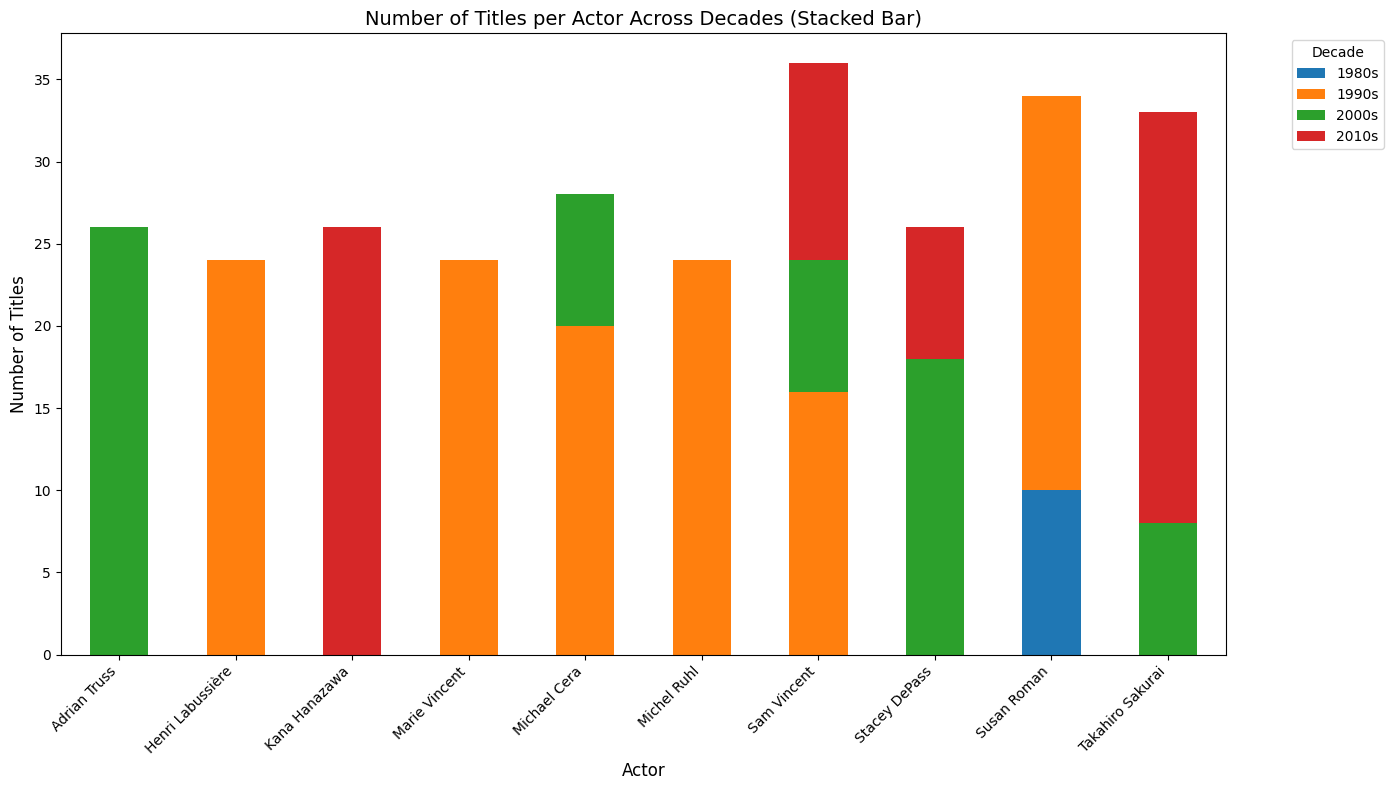

,0
name,
Sam Vincent,36
Susan Roman,34
Takahiro Sakurai,33
Michael Cera,28
Kana Hanazawa,26
Adrian Truss,26
Stacey DePass,26
Michel Ruhl,24
Marie Vincent,24


In [244]:
# Stacked bar chart for Number of Titles per Actor Across Decades using matplotlib pivot
# Categorical to categorical (Release year to decade)
# After joining two dataset
df_actor_decade = data.copy()

# decade column
df_actor_decade['decade'] = (df_actor_decade['release_year'] // 10 * 10).astype('Int64').astype(str) + 's'

# Group by actor and decade
actor_decade_counts = (
    df_actor_decade.groupby(['name', 'decade'])
    .size()
    .reset_index(name='count')
)

# top 10 actors
top_actors = actor_decade_counts.groupby('name')['count'].sum().sort_values(ascending=False).head(10).index
actor_decade_counts = actor_decade_counts[actor_decade_counts['name'].isin(top_actors)]

# Pivot to make decades columns (for stacking)
pivot_table = actor_decade_counts.pivot(index='name', columns='decade', values='count').fillna(0)

# Plotting stacked bar chart
pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8)
)

plt.title('Number of Titles per Actor Across Decades (Stacked Bar)', fontsize=14)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
df_actor_decade.groupby('name').size().sort_values(ascending=False).head(10)

##### 1. Why did you pick the specific chart?

Staked bar chart is good choice when comparing categorical to categorical analysis. When you have two categorical variables:

One for the x-axis (main category).

One for the stacked segments (sub-category).

So to find out Number of Titles per Actor Across Decades, I have choosen this chart.


##### 2. What is/are the insight(s) found from the chart?

* A few top actors have consistently appeared across multiple decades, indicating long-standing careers and sustained relevance.

* Some actors show peak activity in specific decades, revealing their most productive or popular periods.

* The distribution of titles across decades highlights changing trends in actor prominence over time.

* Certain decades have significantly higher title counts, reflecting periods of increased content production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Leverage veteran actors with multi-decade presence for branding, nostalgia-based promotions, or cross-generational appeal.

* Identify decade-specific popular actors to target era-themed content collections or marketing campaigns.

* Insights can guide casting strategies for remakes, spin-offs, or collaborations with actors tied to historically successful periods.

* Recognizing decade trends helps platforms align content curation with audience nostalgia and evolving preferences.

# Multivariate Analysis
Charts involving 3 or more variables — using color, size, faceting, or additional axes

### Chart - 17

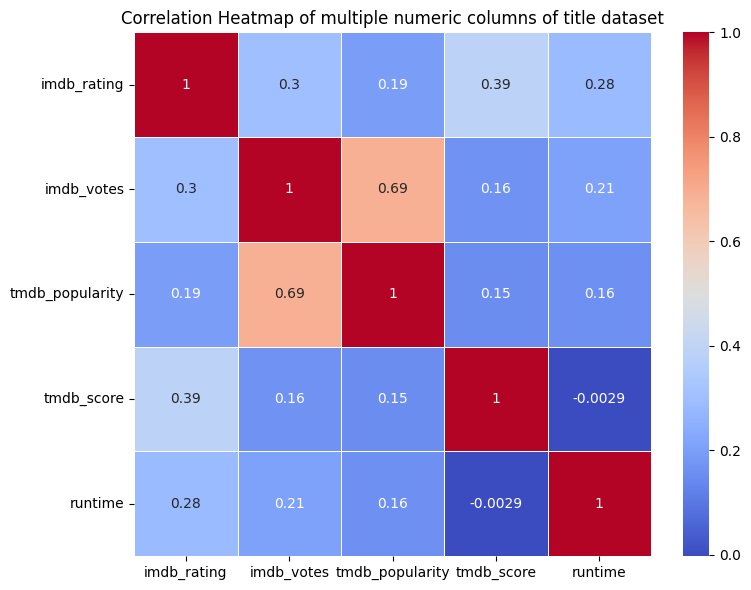

In [245]:
# Correlation Heatmap
# Correlation between numeric columns of titles dataset using matplotlib and seaborn

num_cols = ['imdb_rating', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'runtime']

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_titles[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of multiple numeric columns of title dataset')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap is a good choice to understand relationships between categorical features.
Correlation visualization between numeric features.
Frequency matrices, confusion matrices, co-occurrence analysis. It is also good for Multivariate analysis.

So to analyze, Correlation between multiple numeric columns of titles dataset, I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* IMDb votes show strong positive correlation with IMDb ratings, indicating that titles with higher ratings tend to attract more audience engagement.

* TMDB popularity is moderately correlated with both IMDb votes and ratings, reflecting consistent audience reception across platforms.

* Runtime has weak correlation with ratings and popularity, implying that length of content does not significantly impact audience reception.

* Correlation patterns highlight interrelationships between engagement metrics (ratings, votes, popularity) rather than production factors.

Buisness Impact

* Focus marketing efforts on highly rated content, as it tends to drive more user engagement and popularity.

* Cross-platform promotion can be effective since popularity aligns moderately between IMDb and TMDB.

* Runtime should not be a major decision factor in content acquisition — quality and appeal matter more.

* Use these correlations to prioritize titles for recommendation algorithms and strategic promotion to maximize engagement.

### Chart - 18

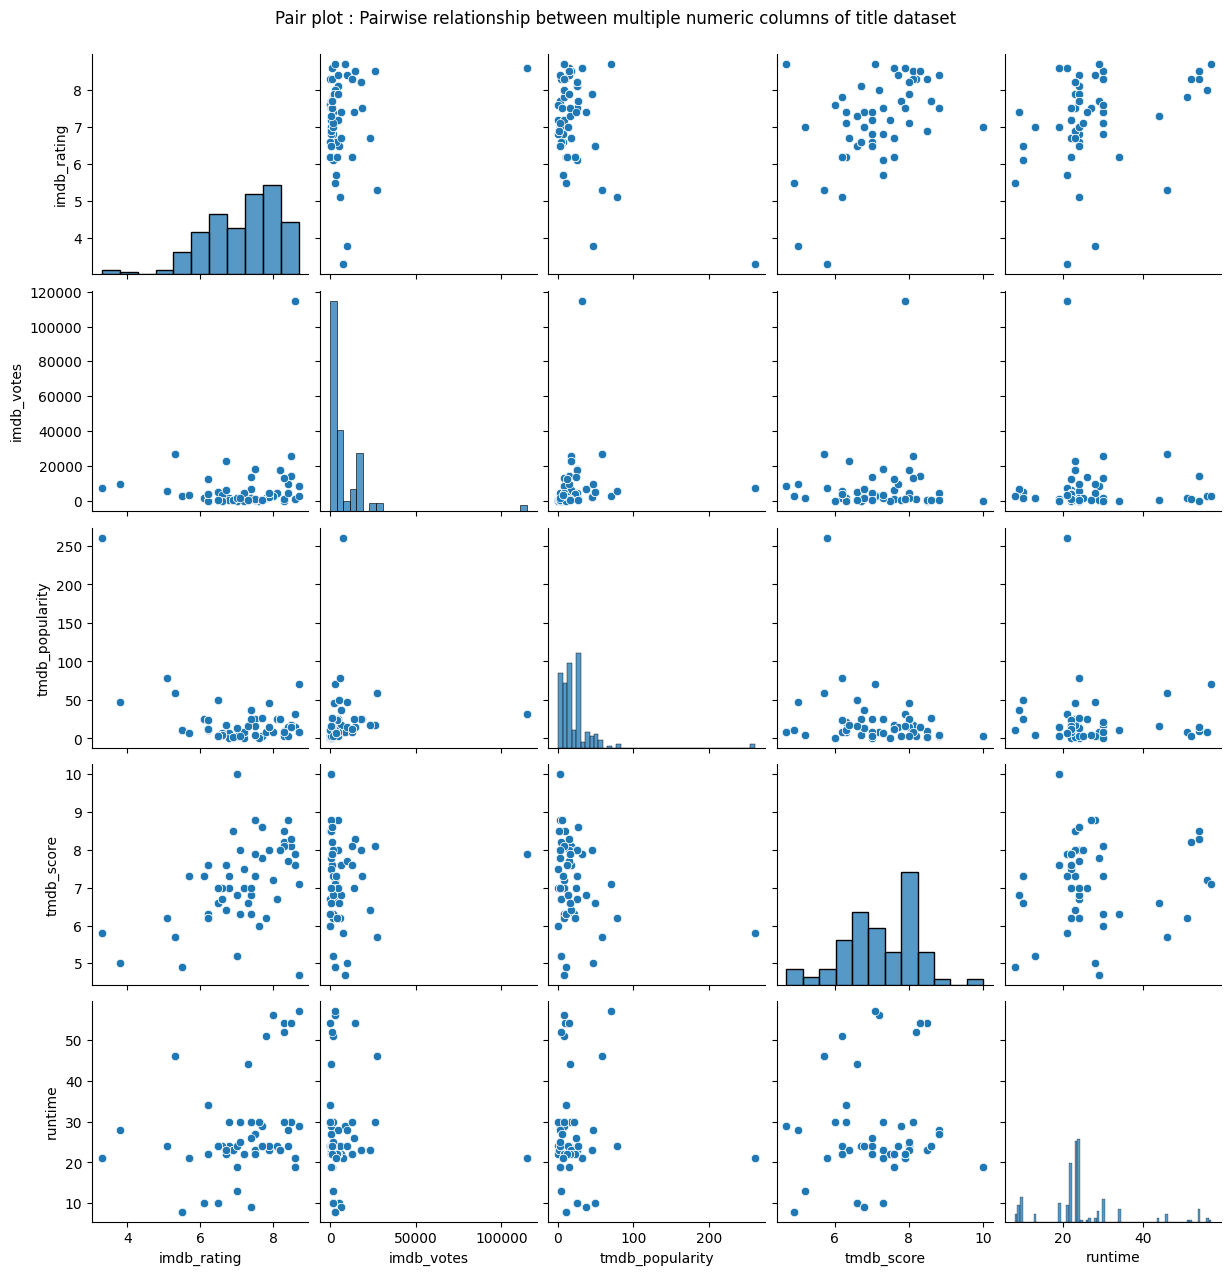

In [246]:
# Pair Plot
# Pairwise relationship between multiple numeric columns of title dataset using matplotlib and seaborn
num_cols = ['imdb_rating', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'runtime']
pair_data=df_titles[num_cols].head(200)
sns.pairplot(pair_data)
plt.suptitle('Pair plot : Pairwise relationship between multiple numeric columns of title dataset', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is a great choice for exploring relationships and distributions between multiple numerical variables and also provides multiple plots in one view.

 So to determine Pairwise relationship between multiple numeric columns of title dataset, I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* Positive relationships are visible between IMDb votes, IMDb ratings, and TMDB popularity, confirming that popular titles generally receive both higher ratings and more votes.

* Some variable pairs (e.g., runtime vs others) show no clear pattern, indicating weaker or no direct relationships.

* The diagonal histograms highlight different distributions: IMDb votes and TMDB popularity are right-skewed, meaning a few titles dominate engagement.

* The pairwise plots reveal clusters and potential outliers, especially in votes vs popularity relationships.

Buisness Impact

* Titles with high ratings and votes should be strategically promoted, as these metrics are strongly interconnected.

* Identifying outliers (high rating but low popularity) presents opportunities for targeted marketing to boost underexposed high-quality titles.

* Weak correlation with runtime indicates content length flexibility — platforms can invest in both short and long formats without risking popularity.

* These insights support data-driven curation, recommendation tuning, and strategic content promotion decisions.


### Chart - 19

In [247]:
# Bubble Chart for Relationship between IMDb rating, runtime, votes using plotly
# numerical relation between IMDb rating, runtime, votes.
fig = px.scatter(
    data, x='imdb_rating', y='runtime',
    title="Bubble chart : IMDb rating vs runtime vs votes",
    size='imdb_votes', color='genres',
    hover_name='name',
    labels={'imdb rating': 'IMDB rating', 'runtime': 'Runtime','imdb_votes':'Total IMDB votes'}
)
fig.update_layout(
    height=700,
    width=950
)
fig.show()

##### 1. Why did you pick the specific chart?

A bubble chart is a good choice here because it effectively visualizes the relationship between three numerical variables simultaneously (IMDb rating, runtime, and votes), reveals patterns and clusters, and allows interactive exploration of key genres through size and hover effects using plotly. So I have choosen this chart

##### 2. What is/are the insight(s) found from the chart?

* A positive relationship exists between IMDb rating and runtime for several genres — higher-rated titles often have moderate to longer runtimes.

* Bubble sizes indicate that titles with higher IMDb votes tend to cluster around mid-to-high ratings, reflecting audience preference for quality content.

* Some genres have distinct runtime-rating clusters, showing how different genres perform across these metrics.

* A few large bubbles at lower ratings highlight high engagement despite lower ratings, possibly due to hype or star power.

Buisness Impact

* Insights help in content strategy: investing in genres and runtimes that consistently yield higher ratings and votes can maximize audience satisfaction.

* Identifying high-vote, low-rating titles supports targeted actions like rebranding, better marketing, or improved quality control.

* Genre-based clustering can guide genre diversification and runtime optimization for future productions.

* Helps platforms prioritize titles for recommendation algorithms based on both popularity and quality


### Chart - 20

In [248]:
# Grouped Bar chart for Number of Titles by Age_cetification across genres using plotly
# categorical to categorical multivariate analysis

import pandas as pd
import plotly.express as px

# Group by certification and genre to count titles
cert_genre_counts = (
    df_titles.groupby(['age_certification', 'genres'])['id'].nunique().reset_index()
    .rename(columns={'id': 'title_count'})
)

# Plotting
fig = px.bar(
    cert_genre_counts,
    x='age_certification',
    y='title_count',
    color='genres',  # hue = genre
    barmode='group',
    title='Number of Titles by Age_cetification across genres',
    labels={
        'age_certification': 'Age Certification',
        'title_count': 'Number of Titles',
        'genres': 'Genre'
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Layout
fig.update_layout(
    xaxis_title='Age Certification',
    yaxis_title='Number of Titles',
    xaxis_tickangle=-30,
    legend_title='Genre',
    bargap=0.15,
    bargroupgap=0.1
)

fig.show()


##### 1. Why did you pick the specific chart?

A grouped bar plot is an excellent choice for categorical distribution, because it clearly shows and compares values across categories, supports multiple categories, and is easy to interpret accurately. So in order to compare Number of Titles by Age_cetification Across genres, I have choosen this chart.

##### 2. What is/are the insight(s) found from the chart?

* Different age certifications show distinct genre distributions, highlighting how content type aligns with audience maturity levels.

* General and family-friendly certifications (e.g., TV-Y, TV-G, TV-PG) are dominated by animation, family, and comedy genres.

* Teen and adult certifications (e.g., TV-14, TV-MA) have a wider genre mix, including drama, action, and thriller.

* Certain genres are heavily skewed toward specific certifications, indicating targeted content creation for those age groups.

Buisness Impact

* Helps in content segmentation and personalized recommendations based on user age groups and genre preferences.

* Guides content acquisition and production strategies by revealing which genres perform well under each certification.

* Enables platforms to balance their catalog — e.g., increasing teen or family-oriented content where gaps exist.

* Valuable for marketing teams to align promotional campaigns with the right target audience and genre mix.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* Leverage Data-Driven Insights: Use the patterns identified through visualizations (e.g., genre–rating relationships, country-wise performance, certification-based trends) to guide content acquisition and production strategies.

* Focus on High-Performing Segments: Invest more in genres, age certifications, and production countries that consistently show higher IMDb ratings, greater popularity, or higher audience engagement.

* Optimize Content Portfolio: Balance popular mainstream content with niche, high-rated categories to maximize both reach and viewer satisfaction.

* Strengthen Talent Strategy: Use actor-decade and appearance data to identify high-impact actors and strategic collaborations.

* Monitor Trends Over Time: Track popularity and ratings by decade/year to forecast demand shifts and make informed decisions on future releases and marketing focus.

# **Conclusion**

* The project provided a structured analysis of Amazon Prime Video’s content, focusing on trends across genres, certifications, regions, and performance metrics.

* Data cleaning and preprocessing ensured accurate and meaningful insights through various statistical and visualization techniques.

* Key findings highlight dominant genres, influential production countries, evolving content trends over decades, and strong correlations between popularity, ratings, and audience engagement.

* These insights can support strategic decisions in content acquisition, marketing, and audience targeting, ultimately enhancing platform growth and competitiveness.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***